In [1]:
from sympy import *
import copy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

#Definiciones
M,t,r,theta,phi ,e,G,c = symbols('M t r theta phi e G c')
x,y,z = symbols('x y z')
v=Function('v')(t)
#define the coordinates
coord = [t,x,y,z ]
coord_pol=[t,r,theta,phi]
coord_nombres = ["t","r","\theta","\phi"]
I2=eye(4)
I3=eye(4)

I3[0,0]=-1


#Orden hasta la que realizar la expansión en serie en términos de velocidad
orden=4
orden+=1

if orden %2 ==0:
    orden_par=orden
else:
    orden_par=orden+1
    
G=zeros(4)
def delta_dirac(i,j):
    if i==j:
        return 1
    else:
        return 0

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#Definición de los coeficientes de la métrica como funciones
S=zeros(4)
G=symbols('G')

#v=symbols('v')
v=Function('v')(r,G,M)
S[0,0]=-c**2*(1-2*G*M/(c**2*r))
S[1,1]=1/(1-(2*G*M)/(c**2*r))
S[2,2]=r**2
S[3,3]=r**2*sin(theta)**2

GM=1.989*6.67*10**(19)

#v=sqrt(1.989*6.67*10**(19))*e/r**0.5
v=e/r**0.5

SS=S.subs(G,v**2*r/M)
for i in range(4):
    for j in range(4):
        SS[i,j]=series(SS[i,j],e,0,orden)
       
#SS=SS.subs(r,sqrt(x**2+y**2+z**2))

for i in range(4):
    for j in range(4):
        exec(f"g{i}{j}r=Function('g{i}{j}r')") 
        exec(f"g{i}{j}r=0") 
        for k in range(orden):    
            exec(f"g{i}{j}r{k}=SS[{i},{j}].coeff(e,{k})")
            exec(f"g{i}{j}r=g{i}{j}r + g{i}{j}r{k}*e**{k}")   
            


for i in range(4):
    for j in range(4):
        I3[i,j]=SS[i,j].collect(e).coeff(e,0)
I33=I3.inv()
#I33[0,0]=(-1)*I33[0,0]
SS

Matrix([
[-c**2 + 2*e**2/r,                                                  0,    0,                  0],
[               0, 4*e**4/(c**4*r**2) + 2*e**2/(c**2*r) + 1 + O(e**5),    0,                  0],
[               0,                                                  0, r**2,                  0],
[               0,                                                  0,    0, r**2*sin(theta)**2]])

A continuación, se trabajará exclusivamente con símbolos para, al final, sustituir lo obtenido por los coeficientes de la métrica y sus correspondientes derivadas parciales.

In [5]:
#Definimos como símbolos los elementos de la métrica y sus coeficientes de la expansión en serie
for i in range(4):
    for j in range(4):
        exec(f"g{i}{j}=symbols('g_{i}{j}')")    
        #exec(f"g{i}{j}r=symbols('g_{i}{j}')")    

        #exec(f"g{i}{j}r=Function('g_{i}{j}r')(t,x,y,z,v)")    
        exec(f"g{i}{j}={I3[i,j]}")        
        for k in range(orden):
            exec(f"g{i}{j}{k} = symbols('g^{k}_{i}{j}')")

            #exec(f"g{i}{j}{k}r = Function('g^{k}_{i}{j}r')(t,x,y,z,v)")

#Escribimos explícitamente la expansión en serie
for i in range(4):
    for j in range(i,4):       
        for k in range(1,orden):
            exec(f"g{i}{j}=g{i}{j}+e**{k}*g{i}{j}{k}")
            #exec(f"g{i}{j}r=g{i}{j}r+e**{k}*g{i}{j}r{k}")
                       
            
            
            
#Órdenes que se anulan por la naturaleza del problema
for i in range(1,4):
    for k in range(2,orden_par-1,2):
        exec(f"g0{i}=g0{i}.subs(g0{i}{k},0)")           
    exec(f"g0{i}=g0{i}.subs(g0{i}1,0)")
for i in range(1,4):
    for j in range(i,4):
        for k in range(1,orden,2):
            exec(f"g{i}{j}=g{i}{j}.subs(g{i}{j}{k},0)")  
            
            exec(f"g00=g00.subs(g00{k},0)")




for i in range(4):
    for j in range(0,i):
        exec(f"g{i}{j}=g{j}{i}")

        
#Generamos la matriz de la métrica        
G=zeros(4)
for i in range(4):
    for j in range(i,4):
        exec(f"G[{i},{j}]=g{i}{j}")
for i in range(4):
    for j in range(0,i):
        exec(f"G[{i},{j}]=g{j}{i}")
        
G
        

Matrix([
[-c**2 + e**4*g^4_00 + e**2*g^2_00,                   e**3*g^3_01,                      e**3*g^3_02,                                    e**3*g^3_03],
[                      e**3*g^3_01, e**4*g^4_11 + e**2*g^2_11 + 1,        e**4*g^4_12 + e**2*g^2_12,                      e**4*g^4_13 + e**2*g^2_13],
[                      e**3*g^3_02,     e**4*g^4_12 + e**2*g^2_12, e**4*g^4_22 + e**2*g^2_22 + r**2,                      e**4*g^4_23 + e**2*g^2_23],
[                      e**3*g^3_03,     e**4*g^4_13 + e**2*g^2_13,        e**4*g^4_23 + e**2*g^2_23, e**4*g^4_33 + e**2*g^2_33 + r**2*sin(theta)**2]])

In [6]:
#Definimos como símbolos los elementos de la inversa de la métrica y sus coeficientes de la expansión en serie
for i in range(4):
    for j in range(4):
        exec(f"gg{i}{j}=symbols('g^{i}{j}')")    
        exec(f"gg{i}{j}r=Function('g^{i}{j}r')(t,x,y,z,v)")    
        exec(f"gg{i}{j}={I33[i,j]}")        
        for k in range(orden):
            exec(f"gg{i}{j}{k} = symbols('g^{i}{j}{k}')")
            exec(f"gg{i}{j}{k}r = Function('g^{i}{j}{k}r')(t,x,y,z,v)")

#Escribimos explícitamente la expansión en serie
for i in range(4):
    for j in range(i,4):       
        for k in range(1,orden):
            exec(f"gg{i}{j}=gg{i}{j}+e**{k}*gg{i}{j}{k}")
            exec(f"gg{i}{j}r=gg{i}{j}r+e**{k}*gg{i}{j}{k}r")
            
            
#Órdenes que se anulan por su naturaleza
for i in range(1,4):
    for k in range(2,orden-1,2):
        exec(f"gg0{i}=gg0{i}.subs(gg0{i}{k},0)")           
    exec(f"gg0{i}=gg0{i}.subs(gg0{i}1,0)")
for i in range(1,4):
    for j in range(i,4):
        for k in range(1,orden,2):
            exec(f"gg{i}{j}=gg{i}{j}.subs(gg{i}{j}{k},0)")           
for k in range(1,orden_par-1,2):
    exec(f"gg00=gg00.subs(gg00{k},0)")    
    




#Definición de ciertas funciones útiles para usos posteriores
def cortar_orden(expr,orden=4):
    coef=zeros(1,orden+1)
    expresion=0
    for i in range(orden+1):
        coef[i]=expr.expand().coeff(e,i)
        expresion+=coef[i]*e**i
    return expresion

def dejar_orden(expr,orden=4):
    return expr.expand().coeff(e,orden)

def cortar_orden_matriz(matr,orden=4,dim=4):
    m=zeros(dim)
    for i in range(dim):
        for j in range(dim):
            m[i,j]=cortar_orden(matr[i,j],orden)
    return m

def dejar_orden_matriz(matr,orden=4,dim=4):
    return cortar_orden_matriz(matr,orden+1,dim)-cortar_orden_matriz(matr,orden-1,dim)

def sustituir_matriz(matr,simbolo,valor,dim=4):
    m=copy(matr)
    for i in range(dim):
        for j in range(dim):
            m[i,j]=m[i,j].subs(simbolo,valor)
            
    return m 

In [7]:
gg11

e**4*g^114 + e**2*g^112 + 1

In [8]:
#Definimos la matriz inversa
Ginv=zeros(4)
for ii in range(4):
    for jj in range(ii,4):
        exec(f"Ginv[{ii},{jj}]=gg{ii}{jj}")
for ii in range(4):
    for jj in range(0,ii):
        exec(f"Ginv[{ii},{jj}]=gg{jj}{ii}")
        
Ginv

Matrix([
[e**4*g^004 + e**2*g^002 - 1/c**2,     e**4*g^014 + e**3*g^013,           e**4*g^024 + e**3*g^023,                          e**4*g^034 + e**3*g^033],
[         e**4*g^014 + e**3*g^013, e**4*g^114 + e**2*g^112 + 1,           e**4*g^124 + e**2*g^122,                          e**4*g^134 + e**2*g^132],
[         e**4*g^024 + e**3*g^023,     e**4*g^124 + e**2*g^122, e**4*g^224 + e**2*g^222 + r**(-2),                          e**4*g^234 + e**2*g^232],
[         e**4*g^034 + e**3*g^033,     e**4*g^134 + e**2*g^132,           e**4*g^234 + e**2*g^232, e**4*g^334 + e**2*g^332 + 1/(r**2*sin(theta)**2)]])

In [10]:
##Con las ecuaciones obtenidas en I1, resolvemos el sistema y sustituimos los terminos de Ginv en función de los de G, obteniendo Ginv2
Ginv2=zeros(4)
I1=Ginv*G
I1=cortar_orden_matriz(I1.expand(),orden-1)-I2
espacio=" /  "
for i in range(4):
    for j in range(i,4):
        for k in range(1,orden):
            for k2 in range(1,orden):
               
                exec(f"cond=(len(solve((I1[{i},{j}]).coeff(e,{k2}),gg{i}{j}{k}))>0)")
               
                if cond:
                    exec(f"h{i}{j}{k}=solve((I1[{i},{j}]).coeff(e,{k2}),gg{i}{j}{k})[0]")  ##Resolvemos las ecuaciones                
                    for iii in range(4):
                        for jjj in range(iii,4):
                            exec(f"gg{iii}{jjj}=gg{iii}{jjj}.subs(gg{i}{j}{k},h{i}{j}{k})") ##Sustituimos la solución 
                                                                                            ##en todos los términos de gg
                                
                            exec(f"I1[{iii},{jjj}]=I1[{iii},{jjj}].subs(gg{i}{j}{k},h{i}{j}{k})") ##Sustituimos la solución en 
                                                                                                  ##todos los términos de I1
             

            
##Una vez resuelto el sistema, solo queda igualar término a término la matriz resultante
for ii in range(4):
    for jj in range(ii,4):
        exec(f"Ginv2[{ii},{jj}]=gg{ii}{jj}")
for ii in range(4):
    for jj in range(0,ii):
        exec(f"Ginv2[{ii},{jj}]=gg{jj}{ii}")
       
Ginv2


Matrix([
[-1/c**2 - e**2*g^2_00/c**4 + e**4*(-c**2*g^4_00 - g^2_00**2)/c**6,                                                                                                                              e**3*g^3_01/c**2,                                                                                                                       e**3*g^3_02/(c**2*r**2),                                                                                                                      e**3*g^3_03/(c**2*r**2*sin(theta)**2)],
[                                                 e**3*g^3_01/c**2,                                                 e**4*(g^2_11**2 + g^2_12**2/r**2 + g^2_13**2/(r**2*sin(theta)**2) - g^4_11) - e**2*g^2_11 + 1,                             e**4*(g^2_12*g^2_22 + r**2*(g^2_11*g^2_12 + g^2_13*g^2_23/(r**2*sin(theta)**2) - g^4_12))/r**4 - e**2*g^2_12/r**2,              e**4*(g^2_11*g^2_13*r**2 + g^2_12*g^2_23 + g^2_13*g^2_33/sin(theta)**2 - g^4_13*r**2)/(r**4*sin(theta)**2) - e**2

In [13]:
#Sustitución de los símbolos por funciones

Ginv3=copy.deepcopy(Ginv2)               
for i in range(4):
    for j in range(4):
        for k in range(2,orden):
            exec(f"Ginv3=Ginv3.subs(g{i}{j}{k},g{i}{j}r{k})")
Ginv3

Matrix([
[-1/c**2 - 2*e**2/(c**4*r) - 4*e**4/(c**6*r**2),                   0,       0,                      0],
[                                             0, 1 - 2*e**2/(c**2*r),       0,                      0],
[                                             0,                   0, r**(-2),                      0],
[                                             0,                   0,       0, 1/(r**2*sin(theta)**2)]])

In [16]:

for i in range(4):
    for j in range(4):
        for k in range(j,4): 
            exec(f"T{i}{j}{k}=symbols('\Gamma^{i}_{j}{k}')")
            exec(f"T{i}{j}{k}=0")
            for h in range(4):
                exec(f"T{i}{j}{k}+=0.5*Ginv3[{i},{h}]*(diff(SS[{h},{j}],coord_pol[{k}])+diff(SS[{h},{k}],coord_pol[{j}])-diff(SS[{j},{k}],coord_pol[{h}]))")
                     #d{k}G[{h},{j}]+d{j}G[{h},{k}]-d{h}g{j}{k})")
            exec(f"T{i}{j}{k}=cortar_orden(T{i}{j}{k},orden)")
            
            exec(f"T{i}{k}{j}=T{i}{j}{k}")
            
for i in range(4):
    for j in range(4):
        for k in range(4):
            exec(f"print('T',i,j,k,'=',T{i}{j}{k}.expand())")
            

T 0 0 0 = 0
T 0 0 1 = 1.0*e**2/(c**2*r**2) + 2.0*e**4/(c**4*r**3)
T 0 0 2 = 0
T 0 0 3 = 0
T 0 1 0 = 1.0*e**2/(c**2*r**2) + 2.0*e**4/(c**4*r**3)
T 0 1 1 = 0
T 0 1 2 = 0
T 0 1 3 = 0
T 0 2 0 = 0
T 0 2 1 = 0
T 0 2 2 = 0
T 0 2 3 = 0
T 0 3 0 = 0
T 0 3 1 = 0
T 0 3 2 = 0
T 0 3 3 = 0
T 1 0 0 = 1.0*e**2/r**2 - 2.0*e**4/(c**2*r**3)
T 1 0 1 = 0
T 1 0 2 = 0
T 1 0 3 = 0
T 1 1 0 = 0
T 1 1 1 = -1.0*e**2/(c**2*r**2) - 2.0*e**4/(c**4*r**3)
T 1 1 2 = 0
T 1 1 3 = 0
T 1 2 0 = 0
T 1 2 1 = 0
T 1 2 2 = -1.0*r + 2.0*e**2/c**2
T 1 2 3 = 0
T 1 3 0 = 0
T 1 3 1 = 0
T 1 3 2 = 0
T 1 3 3 = -1.0*r*sin(theta)**2 + 2.0*e**2*sin(theta)**2/c**2
T 2 0 0 = 0
T 2 0 1 = 0
T 2 0 2 = 0
T 2 0 3 = 0
T 2 1 0 = 0
T 2 1 1 = 0
T 2 1 2 = 1.0/r
T 2 1 3 = 0
T 2 2 0 = 0
T 2 2 1 = 1.0/r
T 2 2 2 = 0
T 2 2 3 = 0
T 2 3 0 = 0
T 2 3 1 = 0
T 2 3 2 = 0
T 2 3 3 = -1.0*sin(theta)*cos(theta)
T 3 0 0 = 0
T 3 0 1 = 0
T 3 0 2 = 0
T 3 0 3 = 0
T 3 1 0 = 0
T 3 1 1 = 0
T 3 1 2 = 0
T 3 1 3 = 1.0/r
T 3 2 0 = 0
T 3 2 1 = 0
T 3 2 2 = 0
T 3 2 3 = 1.0*cos(theta

In [17]:

for m in range(4):
    for k in range(4):
        exec(f"R{m}{k}=symbols('R_{m}{k}')")
        exec(f"R{m}{k}=0")
        for l in range(4):
            exec(f"R{m}{k}+=diff(T{l}{m}{l},coord_pol[{k}])-diff(T{l}{m}{k},coord_pol[{l}])")
                 #d{k}T{l}{m}{l}-d{l}T{l}{m}{k}")
            for n in range(4):
                exec(f"R{m}{k}+=T{n}{m}{l}*T{l}{k}{n}-T{n}{m}{k}*T{l}{n}{l}")
        exec(f"R{m}{k}=cortar_orden(R{m}{k}.expand(),{orden}).collect(e)")

In [20]:
for i in range(1,4):
    exec(f"a{i},v{i}=symbols('a{i},v{i}')")
for i in range(1,4):  
    exec(f"a{i}=-T{i}00+v{i}*T000*e")

    for j in range(1,4):
        exec(f"a{i}+=-2*T{i}0{j}*v{j}*e+2*T00{j}*v{j}*v{i}*e**2")                     
        for k in range(1,4):
            exec(f"a{i}+=-T{i}{j}{k}*v{j}*v{k}*e**2+v{i}*(T0{j}{k}*v{j}*v{k})*e**3")
            #print(a1.simplify())
        exec(f"a{+i}=cortar_orden(a{i},orden)")

In [22]:
def aceleraciones(v):
    acel=zeros(1,3)


    for i in range(1,4):
        exec(f"bb{i}=a{i}")
        for j in range(3):            
            exec(f"bb{i}=a{i}.subs(v{j+1},v[{j}+3])")
            exec(f"bb{i}=bb{i}.subs(coord_pol[{j}+1],v[{j}])")
            exec(f"print(bb{i},'   ',i)")
        exec(f"acel[{i}-1]=bb{i}.subs(e,1)")
        exec(f"acel[{i}-1]=acel[{i}-1].subs(c,1)")
        #exec(f"acel.append(a{i}.subs(v0,v[3]).subs(v1,v[4]).subs(v2,v[5]).subs(x,v[0]).subs(x,v[1]).subs(x,v[2])")
    return acel

In [58]:
def df(y,t):

    aa1=a1.subs(r,y0[0])
    aa1=aa1.subs(theta,y0[1])
    aa1=aa1.subs(phi,y0[2])
    aa1=aa1.subs(v1,y0[3])
    aa1=aa1.subs(v2,y0[4])
    aa1=aa1.subs(v3,y0[5])
    aa1=aa1.subs(e,1)
    aa1=aa1.subs(c,3*10**8)

    aa2=a2.subs(r,y0[0])
    aa2=aa2.subs(theta,y0[1])
    aa2=aa2.subs(phi,y0[2])
    aa2=aa2.subs(v1,y0[3])
    aa2=aa2.subs(v2,y0[4])
    aa2=aa2.subs(v3,y0[5])
    aa2=aa2.subs(e,1)
    aa2=aa2.subs(c,3*10**8)

    aa3=a3.subs(r,y0[0])
    aa3=aa3.subs(theta,y0[1])
    aa3=aa3.subs(phi,y0[2])
    aa3=aa3.subs(v1,y0[3])
    aa3=aa3.subs(v2,y0[4])
    aa3=aa3.subs(v3,y0[5])
    aa3=aa3.subs(e,1)
    aa3=aa3.subs(c,3*10**8)
   # print(aa1,aa2,aa3)

    resultado=[y[3],y[4],y[5],aa1,aa2,aa3]
    return resultado
long=5000
tt=np.linspace(0,105,long)
y0=[5,1.0,1,0,0.05,0.1]
#y0=[82000000000,1.0,1,0,0.00000025,0.0000002]
#y0=[10,3.141592/2+0.1,0,0,0.0005,0.05]


In [61]:
solucion=odeint(df,y0,tt)

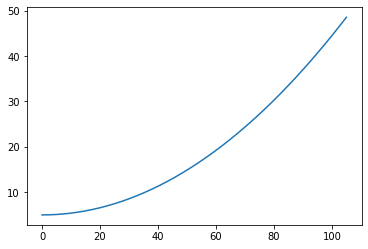

In [62]:
sol=solucion[:,0]
plt.plot(tt,sol)

In [63]:
theta_n=solucion[:,1]
phi_n=solucion[:,2]
r_n=solucion[:,0]
X = r_n * np.sin(theta_n) * np.cos(theta_n)
Y = r_n * np.sin(phi_n) * np.sin(theta_n)
Z = r_n * np.cos(phi_n)

theta_ss=np.arange(0,2*np.pi,0.01)
phi_ss=np.arange(0,np.pi,0.01)

theta_s,phi_s=np.meshgrid(theta_ss,phi_ss)
rr=2
XX=rr*np.sin(phi_s)*np.cos(theta_s)
YY=rr*np.sin(phi_s)*np.sin(theta_s)
ZZ=rr*np.cos(phi_s)

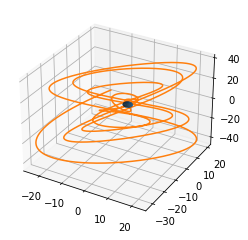

In [64]:
fig=plt.figure()
#ax = fig.add_subplot(111)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX,YY,ZZ)
plt.plot(X,Y,Z)

plt.show()

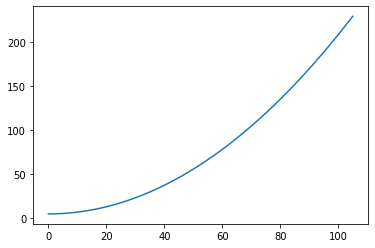

In [30]:
plt.plot(tt,r_n)